In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('Rain Prediction Train.csv')

In [4]:
data['Date']=pd.to_datetime(data['Date'])
data['day']=data['Date'].dt.day
data['month']=data['Date'].dt.month
data['year']=data['Date'].dt.year

In [5]:
data.shape

(100000, 26)

In [6]:
#1.Find the windy (Highest wind speed and frequent high-speed winds) places to build a windmill.
#Also find the sunny places to setup a solar field. 
#Take values more than 75 percentile as minimum values for analysis.
hs=data.groupby(['Location'])['WindGustSpeed'].mean().reset_index()
hsw=hs[(hs['WindGustSpeed'])>(hs['WindGustSpeed'].quantile(q=0.75))]
hswi=hsw.sort_values(by='WindGustSpeed',ascending=False)
hswi.head()

,Location,WindGustSpeed
15,Hobart,47.572130
19,MelbourneAirport,47.065598
38,SydneyAirport,47.011888
23,MountGinini,46.289501
47,Wollongong,45.852144


In [7]:


hswi=hsw.sort_values(by='WindGustSpeed',ascending=False)


As per the above obtained Woomera,Townsville,Hobart,Wollongong,Nhil are the most windiest places. so this are the best places to commission a windmill

In [8]:
#Find the sunny places to setup a solar field.
sun=data.groupby(['Location'])['Sunshine'].mean().reset_index()
suns=sun[(sun['Sunshine'])>(sun['Sunshine'].quantile(q=0.75))]
sunsh=suns.sort_values(by='Sunshine',ascending=False)
sunsh.head()

,Location,Sunshine
3,AliceSprings,9.572073
48,Woomera,9.025283
21,Moree,8.926383
29,PearceRAAF,8.853807
31,Perth,8.807993


In [9]:
#2.Find the locations where humidity and temperature are more than 80 percentile value.
h9=data['Humidity9am'].quantile(0.80)
h3=data['Humidity3pm'].quantile(0.80)
t9=data['Temp9am'].quantile(0.80)
t3=data['Temp3pm'].quantile(0.80)
hum=data[(data['Humidity9am' ]>int(h9)) & (data['Humidity3pm']>int(h3)) & (data['Temp9am']>int(t9)) & (data['Temp3pm']>int(t3)) ]
hum[['Location','Humidity9am','Humidity3pm','Temp9am','Temp3pm']]

,Location,Humidity9am,Humidity3pm,Temp9am,Temp3pm
110,Cairns,92.0,70.0,24.7,28.9
364,Darwin,94.0,81.0,26.6,29.0
556,Townsville,98.0,73.0,23.9,28.2
2083,Townsville,87.0,76.0,27.7,28.8
2403,NorfolkIsland,96.0,79.0,23.5,27.3
2612,Townsville,89.0,74.0,24.6,27.2
2737,Cairns,98.0,76.0,24.9,29.0
2901,Cairns,93.0,80.0,25.9,28.5
3561,Townsville,87.0,79.0,27.6,29.4
4904,Darwin,91.0,71.0,24.8,28.7


By taking the places with more than of the threshold values above are the obtained cities

In [10]:
#3.Find 3 places where rainfall, sunshine, humidity is not too high or too low[ Use logical threshold using percentile values]
#considering the threshold value as 50%
su=data['Sunshine'].quantile(0.50)
rai=data['Rainfall'].quantile(0.50)
hu9=data['Humidity9am'].quantile(0.50)
hu3=data['Humidity3pm'].quantile(0.50)
rsh=data[(data['Sunshine' ]>int(su)) & (data['Rainfall']>int(rai)) & (data['Humidity9am' ]>int(hu9)) & (data['Humidity3pm']>int(hu3))]
rsh[['Location','Sunshine','Rainfall','Humidity9am','Humidity3pm']].head(3)

,Location,Sunshine,Rainfall,Humidity9am,Humidity3pm
222,NorfolkIsland,10.0,1.0,80.0,72.0
225,Cairns,9.5,1.4,72.0,53.0
305,Darwin,11.1,1.0,71.0,63.0


Nokfolksland,Cairns and Darwin are the places that receive rainfall,humidity and sunshine than that of the place by considering the threshold value as 50 %

In [11]:
#4.Find the top 3 places where rainfall is high, but cloud cover is low and vice versa. Take cloud cover avg>5.
r=data['Rainfall'].mean()
cloud=data[(data['Cloud9am']<int(r))& (data['Cloud3pm']<int(r))&(data['Rainfall']>int(r)) ]
cloud[['Location','Rainfall','Cloud9am','Cloud3pm']].head(3)

,Location,Rainfall,Cloud9am,Cloud3pm
240,Watsonia,7.4,1.0,1.0
555,Mildura,2.2,0.0,1.0
678,Woomera,7.8,0.0,0.0


Watsonia,Mildura,Woomera receive the high rainfall  with low cloud cover in cms considering the cloud avg as 5

In [12]:
#Vice-versa
l=data['Rainfall'].mean()
cloud=data[(data['Cloud9am']>int(l))& (data['Cloud3pm']>int(l))&(data['Rainfall']<int(l)) ]
cloud[['Location','Rainfall','Cloud9am','Cloud3pm']].head(3)

,Location,Rainfall,Cloud9am,Cloud3pm
1,Portland,0.0,7.0,8.0
6,Sale,0.0,7.0,3.0
13,Bendigo,0.2,8.0,8.0


Watsonia,Mildura,Woomera receive the low rainfall with high cloud cover in cms considering the cloud avg as 5

In [13]:
#5.Which wind direction causes rains in which cities ?
wind=data[data['RainTomorrow']=='Yes']
windd=wind.groupby(['WindGustDir','Location']).count()
windd

Date  MinTemp  MaxTemp  Rainfall  Evaporation  \
WindGustDir Location                                                          
E           Adelaide             8        8        8         7            2   
            Albury              11       11       11        10            0   
            AliceSprings        20       20       20        20           19   
            BadgerysCreek       29       29       29        29            0   
            Ballarat             1        1        1         1            0   
            Bendigo              3        3        3         3            2   
            Brisbane            90       90       90        90           90   
            Cairns              27       27       27        25           19   
            Canberra            30       30       30        30           17   
            Cobar               23       23       23        23           20   
            CoffsHarbour        27       27       27        27           18   
            Dartmoor             6        6        6         6            6   
            Darwin              51       51       51        51           48   
            GoldCoast           30       30       30        30            0   
            Hobart               8        8        8         8            8   
            Katherine           16       15       15        15           12   
            Launceston           5        5        5         5            0   
            Melbourne            1        1        1         1            1   
            MelbourneAirport     1        1        1         1            1   
            Mildura              4        4        4         4            3   
            Moree               24       24       24        21           17   
            MountGambier         8        8        8         8            8   
            MountGinini         40       40       40        39            0   
            Nhil                11       11       11        11            0   
            NorahHead            8        8        8         8            0   
            NorfolkIsland       89       89       89        88           76   
            Nuriootpa            4        4        4         4            4   
            PearceRAAF          25       25       25        20            0   
            Penrith             10       10       10        10            0   
            Perth                8        8        8         8            8   
...                            ...      ...      ...       ...          ...   
WSW         Melbourne           49       49       49        43           49   
            MelbourneAirport    42       42       42        42           41   
            Mildura             15       15       15        15           15   
            Moree               25       25       25        22           16   
            MountGambier        49       49       49        49           44   
            MountGinini         55       54       55        50            0   
            Nhil                13       13       13        13            0   
            NorahHead            6        6        6         6            0   
            NorfolkIsland       38       38       38        37           35   
            Nuriootpa           57       57       57        55           53   
            PearceRAAF          42       41       42        37            0   
            Penrith             17       17       17        16            0   
            Perth               77       77       77        77           77   
            PerthAirport        58       58       58        58           58   
            Portland            87       87       87        87           76   
            Richmond            17       17       17        17            4   
            Sale                48       48       48        48           31   
            SalmonGums          15       15       15        15            0   
 

By taking the condition as 'Yes' in raintommorrow and grouping the obtained with obtained data as WindGustDir and Location. Direction that causes the rain in corresponding cities is obtained

In [14]:
#The cities in which rain is caused by NNE direction
nne=data[data['WindGustDir']=='NNE']
nnei=nne[nne['RainTomorrow']=='Yes']
nnei.groupby(['WindGustDir','Location']).count()
nnei[['Location','WindGustDir']]


,Location,WindGustDir
1,Portland,NNE
13,Bendigo,NNE
57,Witchcliffe,NNE
69,Bendigo,NNE
101,Bendigo,NNE
148,MountGambier,NNE
316,SalmonGums,NNE
387,SydneyAirport,NNE
481,BadgerysCreek,NNE
561,Dartmoor,NNE


In [15]:
#The cities in which rain  is caused by E direction
e=data[data['WindGustDir']=='E']
ei=e[e['RainTomorrow']=='Yes']
ei.groupby(['WindGustDir','Location']).count()
ei[['Location','WindGustDir']]

,Location,WindGustDir
131,MountGinini,E
232,Portland,E
464,BadgerysCreek,E
470,MountGinini,E
661,Brisbane,E
675,Uluru,E
706,GoldCoast,E
761,Portland,E
854,Moree,E
939,NorfolkIsland,E


In [16]:
#The cities in which rain  is caused by WSW direction
wsw=data[data['WindGustDir']=='WSW']
wswi=wsw[wsw['RainTomorrow']=='Yes']
wswi.groupby(['WindGustDir','Location']).count()
wswi[['Location','WindGustDir']]

,Location,WindGustDir
47,BadgerysCreek,WSW
118,Katherine,WSW
155,MountGinini,WSW
300,Nhil,WSW
586,PerthAirport,WSW
827,Perth,WSW
866,MountGinini,WSW
873,Tuggeranong,WSW
896,Wollongong,WSW
1022,Moree,WSW


In [17]:
#The cities in which rain  is caused by SSW direction
ssw=data[data['WindGustDir']=='SSW']
sswi=ssw[ssw['RainTomorrow']=='Yes']
sswi.groupby(['WindGustDir','Location']).count()
sswi[['Location','WindGustDir']]

,Location,WindGustDir
157,Williamtown,SSW
197,Sydney,SSW
200,Sydney,SSW
221,Dartmoor,SSW
246,Watsonia,SSW
277,Sale,SSW
285,PerthAirport,SSW
477,Watsonia,SSW
545,Penrith,SSW
608,Portland,SSW


In [18]:
#The cities in which rain  is caused by ENE direction
ene=data[data['WindGustDir']=='ENE']
enei=ene[ene['RainTomorrow']=='Yes']
enei.groupby(['WindGustDir','Location']).count()
enei[['Location','WindGustDir']]

,Location,WindGustDir
37,GoldCoast,ENE
76,Brisbane,ENE
114,SalmonGums,ENE
178,Sale,ENE
287,Townsville,ENE
356,Canberra,ENE
518,Darwin,ENE
722,NorahHead,ENE
727,NorfolkIsland,ENE
836,PerthAirport,ENE


In [19]:
#6.Find top 5 coastal cities in which evaporation is higher than mean
#so that we can choose these places for salt preparation plants?
ev=data.groupby(['Location'])['Evaporation'].mean().reset_index()
eva=ev[(ev['Evaporation'])>(ev['Evaporation'].quantile(q=0.75))]
evap=eva.sort_values(by='Evaporation',ascending=False)
evap.head()

,Location,Evaporation
48,Woomera,10.041467
3,AliceSprings,8.981728
21,Moree,7.700751
16,Katherine,7.360676
39,Townsville,7.198803


Woomera,ALicesprings,Katherine,Moree and Townsville are the top 5 coastal cities that obtain much evaporation than the average evaporation value

In [20]:
##7.Suggest a strategy to a winter goods selling company to choose the location and month to promote their products
win=data.groupby(['Location','month'])['MinTemp'].mean().reset_index()
win.sort_values(by='MinTemp',ascending=True)

,Location,month,MinTemp
282,MountGinini,7,-0.012575
283,MountGinini,8,0.533333
281,MountGinini,6,1.094220
284,MountGinini,9,1.554140
280,MountGinini,5,2.008485
114,Canberra,7,2.731771
285,MountGinini,10,3.145402
486,Tuggeranong,7,3.294318
113,Canberra,6,3.345960
115,Canberra,8,3.466492


As per the obtained data, it is much better to promote the Winter Goods in MountGinni on 7th month and 7th Month in Canberra and 7th month in Tuggeranong

In [21]:
#8.What factors effect tomorrow rain column the most in weather dataset ?
ef=data[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTomorrow']]
eff=data.copy()
eff['RainTomorrow'] = eff['RainTomorrow'].str.lower().replace({'yes':1,'no':0})
eff

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,1016.5,7.0,4.0,21.5,24.2,Yes,0,2,7,2014
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,1008.8,7.0,8.0,14.0,21.8,No,1,23,4,2009
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,1019.4,2.0,7.0,12.8,23.6,No,0,11,8,2015
3,2012-11-21,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,1010.6,NaN,NaN,18.9,20.6,No,0,21,11,2012
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1011.8,1.0,1.0,21.7,25.6,No,0,30,7,2013
5,2016-05-20,Albany,10.1,21.8,0.0,0.8,NaN,NaN,NaN,N,...,1003.9,1.0,NaN,12.9,NaN,No,1,20,5,2016
6,2011-01-20,Sale,12.5,24.7,0.0,6.4,6.6,E,31.0,NE,...,1010.9,7.0,3.0,17.5,23.1,No,0,20,1,2011
7,2016-02-24,Moree,19.9,35.0,0.0,10.2,12.5,NNE,37.0,N,...,1013.3,0.0,1.0,24.2,34.4,No,0,24,2,2016
8,2009-04-28,Portland,7.1,13.0,3.6,1.4,3.4,SW,37.0,S,...,1022.7,4.0,6.0,9.7,11.7,Yes,0,28,4,2009
9,2016-08-07,Penrith,12.5,16.9,0.8,NaN,NaN,SW,26.0,SSW,...,NaN,NaN,NaN,13.3,13.1,No,1,7,8,2016


In [22]:
#9.Create a new column as rainfall level with values as no, low, medium, high, heavy as categories and do the bivariate analyses between rainfall level and wind direction 
#no rain    ------> 0 percentile
#low --------->0-25 percentile
#medium--------->25-50 percentile
#high--------->50-75 percentile
#heavy--------->75-100 percentile
new_data=data[['Location','Rainfall','WindDir9am']]
new_data['Rainfall_level'] = ['no rain' if x == 0.00 else 'high' if x < 0.6 else 'heavy' for x in new_data['Rainfall']] 
from scipy.stats import chi2_contingency
import pandas as pd
tble=pd.crosstab(index=new_data['Rainfall_level'],columns=new_data['WindDir9am'])
tble

C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


WindDir9am,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
Rainfall_level,,,,,,,,,,,,,,,,
heavy,947,832,946,1888,908,996,1775,1932,2045,1392,1716,1961,2353,2267,1766,2043
high,394,379,368,772,428,490,562,583,498,491,563,494,548,588,485,477
no rain,5023,4195,4058,5336,3960,4065,3165,3554,3442,4538,4038,2817,2872,2888,2807,2293


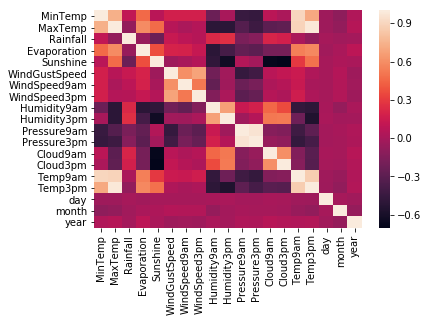

In [23]:
#10.Plot the correlation heatmap between the numerical variables
data_num=data._get_numeric_data()
correlation=data_num.corr()
correlation
sb.heatmap(correlation)